# 機械学習

## 機械学習(machine learning)とは、コンピュータが大量のデータを入力し、そのデータを解析し、その解析結果から有用な情報（たとえば、ルール）を抽出する技術のことです。
## 人工知能(Artificial Intelligence)研究の分野では、人間による学習と同様の機能をコンピュータで実現することが目指されています。

## コンピュータは、機械学習によって、

+ データを分類すること
+ データを予測すること
+ ルールを抽出すること

## などを行えるようになります。


# 機械学習の一例として、手書き文字認識(Handwriting Character Recognition)について学びましょう。

## 手書き文字認識とは、人が手を使って書いたたくさんの文字をコンピュータに学習させ、コンピュータに文字を与えたときに、コンピュータがその文字を識別できるようにすることです。


## コンピュータは、与えられた命令（プログラム）を解釈して、さまざまな機能を実現します。そして、コンピュータに与えるプログラムは、書き換えることができます。したがって、私たちは、コンピュータに与えるプログラムを要求に応じて書き換える事によって、コンピュータに様々な機能を実現させることができます。

## コンピュータに与える命令コード（プログラム）を記述するために用いる言語がプログラミング言語です。これまでに、数え切れないほどたくさんのプログラミング言語が開発され、プログラミング言語は用途に応じて使い分けられています。

## 以下、AI分野で広く使われているPythonというプログラミング言語を使って、コンピュータに手書き文字を認識させます。
### Pythonは、コードがわかりやすく、比較的短い行数で処理を記述できるプログラミング言語です。その上、Pythonは、数値計算、グラフ描画、機械学習などのための非常に多くのライブラリが整備されているため、データ処理の分野で人気のある言語です。






## 1. 手書き数字のデータを読み込み、データを描画する


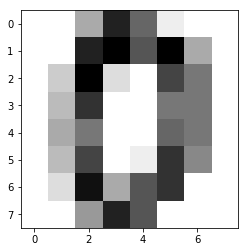

In [1]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import cross_val_score, train_test_split
from matplotlib import pyplot as plt, cm
%matplotlib inline

digits = datasets.load_digits()
digits.images.shape

digits.target[0]

data = digits.images[0]

plt.imshow(data.reshape(8, 8), cmap = cm.gray_r, interpolation = 'nearest')
plt.show()

In [2]:
data_train, data_test, label_train, label_test = train_test_split(digits.data, digits.target)

print(data_train)
print(data_test)

[[ 0.  0.  5. ...  4.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  0.  0. ... 14.  5.  0.]
 ...
 [ 0.  1.  7. ...  3.  0.  0.]
 [ 0.  0.  2. ... 10.  0.  0.]
 [ 0.  0.  9. ...  0.  0.  0.]]
[[ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 12. ...  0.  0.  0.]
 [ 0.  0.  2. ...  0.  5.  4.]
 ...
 [ 0.  0.  1. ... 11.  1.  0.]
 [ 0.  0.  5. ...  7.  0.  0.]
 [ 0.  0.  0. ... 15.  5.  0.]]


In [3]:
clf = svm.SVC(gamma = 0.001)
clf.fit(data_train, label_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
predict = clf.predict(data_test)

In [5]:
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print('clasifier information = ', clf)
print('correct answer rate = ', ac_score)
print('report \n', cl_report)

clasifier information =  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
correct answer rate =  0.9888888888888889
report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      1.00      0.99        44
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        43
           4       1.00      0.98      0.99        43
           5       1.00      0.98      0.99        52
           6       0.97      0.97      0.97        39
           7       0.98      1.00      0.99        40
           8       0.96      0.98      0.97        48
           9       1.00      0.98      0.99        52

   micro avg       0.99      0.99      0.99       450
   macro avg       0.99      0.99      0.99       

In [6]:
from sklearn.externals import joblib

DIGITS_PKL = 'digit-clf.pkl'
joblib.dump(clf, DIGITS_PKL)

['digit-clf.pkl']

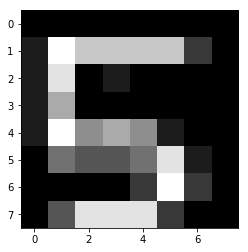

[0. 0. 0. 0. 0. 0. 0. 0. 1. 9. 7. 7. 7. 7. 2. 0. 1. 8. 0. 1. 0. 0. 0. 0.
 1. 6. 0. 0. 0. 0. 0. 0. 1. 9. 5. 6. 5. 1. 0. 0. 0. 4. 3. 3. 4. 8. 1. 0.
 0. 0. 0. 0. 2. 9. 2. 0. 0. 3. 8. 8. 8. 2. 0. 0.]
判定結果= [3]


In [9]:
import os, sys, math
from sklearn import datasets, svm 
from sklearn.externals import joblib

# モデルデータファイル名
DIGITS_PKL = "digit-clf.pkl"

# 予測モデルを作成する --- (*1)
def train_digits():
    # 手書き数字データを読み込む
    digits = datasets.load_digits()
    # 訓練する
    data_train = digits.data
    label_train = digits.target
    clf = svm.SVC(gamma=0.001)
    clf.fit(data_train, label_train)
    # 予測モデルを保存
    joblib.dump(clf, DIGITS_PKL)
    print("予測モデルを保存しました=", DIGITS_PKL)
    return clf

# データから数字を予測する --- (*2)
def predict_digits(data):
    # モデルファイルを読み込む
    if not os.path.exists(DIGITS_PKL):
        clf = train_digits() # モデルがなければ生成
    clf = joblib.load(DIGITS_PKL)
    # 予測
    n = clf.predict([data])
    print("判定結果=", n)

# 手書き数字画像を8x8グレイスケールのデータ配列に変換 --- (*3)
def image_to_data(imagefile):
    import numpy as np
    from PIL import Image
    image = Image.open(imagefile).convert('L')
    image = image.resize((8, 8), Image.ANTIALIAS)
    img = np.asarray(image, dtype=float)
    img = np.floor(16 - 16 * (img / 256)) # 行例演算 --- (*3a)
    # 変換後の画像を表示(コメントを外すと見れます) --- (*3b)
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.gray()
    plt.show()
    img = img.flatten()
    print(img)
    return img 

def main():
    # コマンドライン引数を得る --- (*4)
    if len(sys.argv) <= 1:
        print("USAGE:")
        print("python3 predict_digit.py imagefile")
        return
#    imagefile = sys.argv[1]
    imagefile = 'test5.png'
    data = image_to_data(imagefile)
    predict_digits(data)

if __name__ == '__main__':
    main()



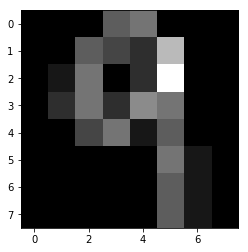

[ 0.  0.  0.  4.  5.  0.  0.  0.  0.  0.  4.  3.  2.  8.  0.  0.  0.  1.
  5.  0.  2. 11.  0.  0.  0.  2.  5.  2.  6.  5.  0.  0.  0.  0.  3.  5.
  1.  4.  0.  0.  0.  0.  0.  0.  0.  5.  1.  0.  0.  0.  0.  0.  0.  4.
  1.  0.  0.  0.  0.  0.  0.  4.  1.  0.]
判定結果= [9]


In [11]:
import os, sys, math
from sklearn import datasets, svm 
from sklearn.externals import joblib

# モデルデータファイル名
DIGITS_PKL = "digit-clf.pkl"

# 予測モデルを作成する --- (*1)
def train_digits():
    # 手書き数字データを読み込む
    digits = datasets.load_digits()
    # 訓練する
    data_train = digits.data
    label_train = digits.target
    clf = svm.SVC(gamma=0.001)
    clf.fit(data_train, label_train)
    # 予測モデルを保存
    joblib.dump(clf, DIGITS_PKL)
    print("予測モデルを保存しました=", DIGITS_PKL)
    return clf

# データから数字を予測する --- (*2)
def predict_digits(data):
    # モデルファイルを読み込む
    if not os.path.exists(DIGITS_PKL):
        clf = train_digits() # モデルがなければ生成
    clf = joblib.load(DIGITS_PKL)
    # 予測
    n = clf.predict([data])
    print("判定結果=", n)

# 手書き数字画像を8x8グレイスケールのデータ配列に変換 --- (*3)
def image_to_data(imagefile):
    import numpy as np
    from PIL import Image
    image = Image.open(imagefile).convert('L')
    image = image.resize((8, 8), Image.ANTIALIAS)
    img = np.asarray(image, dtype=float)
    img = np.floor(16 - 16 * (img / 256)) # 行例演算 --- (*3a)
    # 変換後の画像を表示(コメントを外すと見れます) --- (*3b)
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.gray()
    plt.show()
    img = img.flatten()
    print(img)
    return img 

def main():
    # コマンドライン引数を得る --- (*4)
    if len(sys.argv) <= 1:
        print("USAGE:")
        print("python3 predict_digit.py imagefile")
        return
#    imagefile = sys.argv[1]
    imagefile = 'test9.png'
    data = image_to_data(imagefile)
    predict_digits(data)

if __name__ == '__main__':
    main()

